# ResNet 응용

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [ ]:
res50 = ResNet50()

In [ ]:
from tensorflow.keras.applications.resnet import ResNet101
res101 = ResNet101()

In [ ]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving dog1.jfif to dog1.jfif


In [ ]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h*IMAGE_SIZE ) // w
    else:
        width, height = (w*IMAGE_SIZE)//h, IMAGE_SIZE

    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height)//2       # 행과 열의 차이를 2로 나눈 것
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

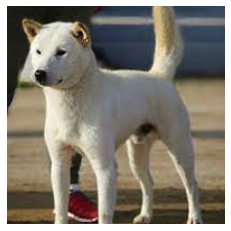

In [ ]:
import matplotlib.pyplot as plt

img = Image.open('dog1.jfif')
img2 = center_image(img)
plt.imshow(img2); plt.axis('off');

* 이미지 예측

In [ ]:
yhat = res50.predict(np.array(img2).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02093256', 'Staffordshire_bullterrier', 0.2102714),
   ('n02093428', 'American_Staffordshire_terrier', 0.111986145),
   ('n02110185', 'Siberian_husky', 0.082312375),
   ('n02110806', 'basenji', 0.074023336),
   ('n02115641', 'dingo', 0.060174692)]])

In [ ]:
label[0][0][1], label[0][0][2]

('golden_retriever', 0.47727662)

In [ ]:
up = files.upload()

Saving puppy.jpg to puppy.jpg


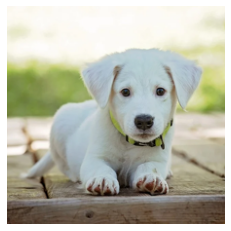

In [ ]:
img = Image.open('puppy.jpg')
img2 = center_image(img)
plt.imshow(img2); plt.axis('off');

In [ ]:
yhat = res50.predict(np.array(img2).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02099601', 'golden_retriever', 0.47727662),
   ('n02099712', 'Labrador_retriever', 0.43168464),
   ('n02104029', 'kuvasz', 0.027136745),
   ('n04409515', 'tennis_ball', 0.008143835),
   ('n03223299', 'doormat', 0.006370802)]])

In [ ]:
label[0][0][1], label[0][0][2]

('golden_retriever', 0.47727662)

In [ ]:
print(f'예측 : {label[0][0][1]}')

예측 : golden_retriever
